# Decision Trees for Classification and Regression Replication 
# by Ninh Nguyen

Introduction

Decision trees are a common model type used for binary classification tasks. The natural structure of a binary tree, which is traversed sequentially by evaluating the truth of each logical statement until the final prediction outcome is reached, lends itself well to predicting a “yes” or “no” target. Such examples include predicting whether a student will pass or fail an exam, whether an email is spam or not, or if a transaction if fraudulent or legitimate.

Decision trees can also be used for regression tasks! Predicting the grade of a student on an exam, the number of spam emails per day, the amount of fraudulent transactions on a platform, etc. are all possible using decision trees. The algorithm works in much the same way, with modification only to the splitting criteria and how the final output it computed. In this article, we will explore both a binary classification and regression model using decision trees with the Indian Graduate Admissions dataset. 

Source: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

### Load data into dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from info_gain import info_gain
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("Admission_Predict.csv")
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

Create a binary class (1=admission likely , 0=admission unlikely) from the chance of admit – greater than 80% we will consider as likely. 

In [3]:
X = df.loc[:,'gre_score':'research']
y = df['chance_of_admit']>=.8

### Fitting and Predicting

once an instance of the model class is instantiated with dt = DecisionTreeClassifier(), .fit() can be used to fit the model on the training set. After fitting, .predict() (and predict_proba()) and .score() can be called to generate predictions and score the model on the test data.

As with other scikit-learn models, only numeric data can be used (categorical variables and nulls must be handled prior to model fitting). In this case, our categorical features have already been transformed and no missing values are present in the data set.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
dt = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))

0.925
0.925


Two methods are available to visualize the tree within the tree module – the first is using tree_plot to graphically represent the decision tree. The second uses export_text to list the rules behind the splits in the decision tree. There are many other packages available for more visualization options – such as graphviz.

|--- cgpa <= 8.85
|   |--- class: False
|--- cgpa >  8.85
|   |--- gre_score <= 313.50
|   |   |--- class: False
|   |--- gre_score >  313.50
|   |   |--- class: True



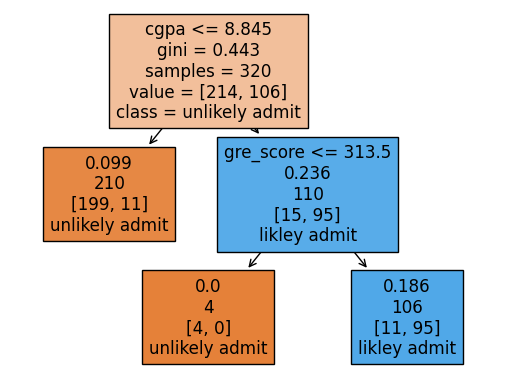

In [5]:
tree.plot_tree(dt, feature_names = x_train.columns,  
               max_depth=3, class_names = ['unlikely admit', 'likley admit'],
               label='root', filled=True)
print(tree.export_text(dt, feature_names = X.columns.tolist()))

### Split Criteria

For a classification task, the default split criteria is Gini impurity – this gives us a measure of how “impure” the groups are. At the root node, the first split is then chosen as the one that maximizes the information gain, i.e. decreases the Gini impurity the most. Our tree has already been built for us, but how was the split cgpa<=8.845 determined? cgpa is a continuous variable, which adds an extra complication, as the split can occur for ANY value of cgpa.

To verify, we will use the defined functions gini and info_gain. By running gini(y_train), we get the same Gini impurity value as printed in the tree at the root node, 0.443. 

In [6]:
# def gini(data):
#     """Calculate the Gini Impurity Score
#     """
#     data = pd.Series(data)
#     return 1 - sum(data.value_counts(normalize=True)**2)
 
# gi = gini(y_train)
# print(f'Gini impurity at root: {round(gi,3)}')

Next, we are going to verify how the split on cgpa was determined, i.e. where did the 8.845 value come from. We will use info_gain over ALL values of cgpa to determine the information gain when split on each value. This is stored in a table and sorted, and voila, the top value for the split is cgpa<=8.845! This is also done for every other feature (and for those continuous ones, every value), to find the top split overall.

In [7]:
# info_gain_list = []
# for i in x_train.cgpa.unique():
#     left = y_train[x_train.cgpa<=i]
#     right = y_train[x_train.cgpa>i]
#     info_gain_list.append([i, info_gain(left, right, gi)])
 
# ig_table = pd.DataFrame(info_gain_list, columns=['split_value', 'info_gain']).sort_values('info_gain',ascending=False)
# ig_table.head(10)

In [8]:
# plt.plot(ig_table['split_value'], ig_table['info_gain'],'o')
# plt.plot(ig_table['split_value'].iloc[0], ig_table['info_gain'].iloc[0],'r*')
# plt.xlabel('cgpa split value')
# # plt.ylabel('info gain')

After this process is repeated, and there is no further info gain by splitting, the tree is finally built. Last to evaluate, any sample traverses through tree and appropriate splits until it reaches a leaf node, and then assigned the majority class of that leaf (or weighted majority).

### Regression

For the regression problem, we will use the unaltered chance_of_admit target, which is a floating point value between 0 and 1.

In [9]:
X = df.loc[:,'gre_score':'research']
y = df['chance_of_admit']

### Fitting and Predicting

The syntax is identical as the decision tree classifier, except the target, y, must be real-valued and the model used must be DecisionTreeRegressor(). As far as model hyperparameters, almost all are the same, except the criterion used must be for a regression task – the default is MSE (mean squared error), which we will investigate below:

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
dt = DecisionTreeRegressor(max_depth=3, ccp_alpha=0.001)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))

0.5230242793515552


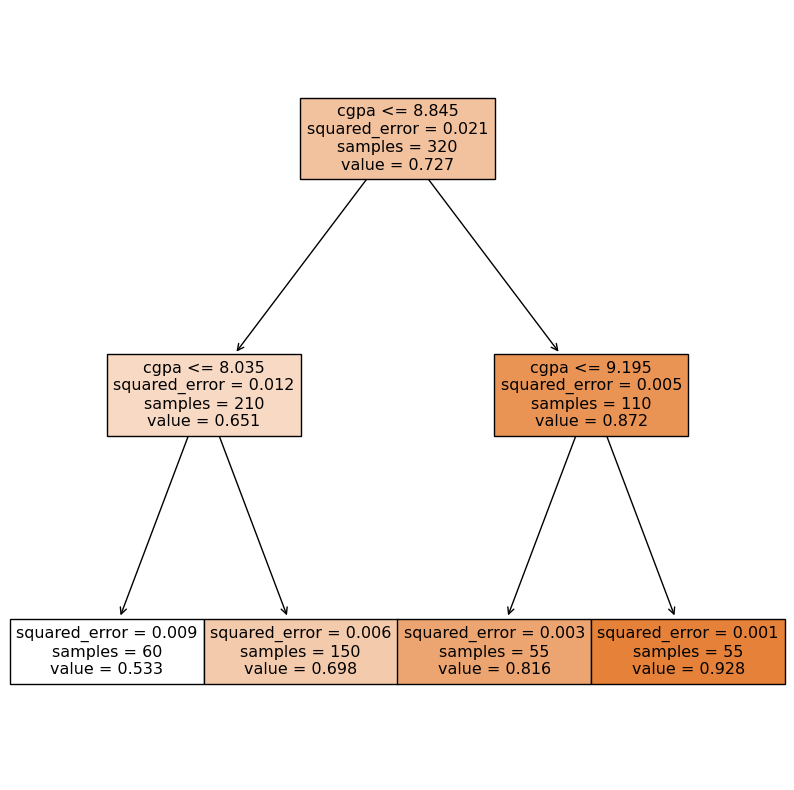

In [11]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt, feature_names = x_train.columns,  
               max_depth=2, filled=True);